### Spatial Filtering

In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Averaging filter

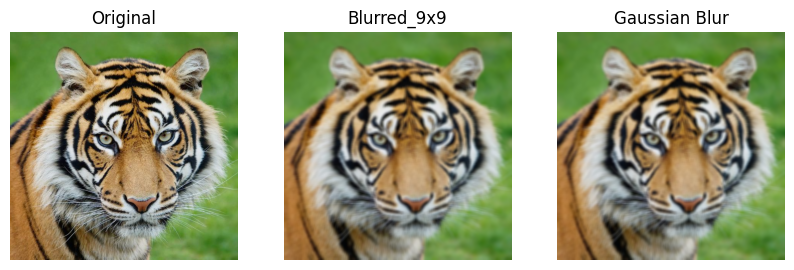

In [25]:
img = cv.imread('tiger.jpg', cv.IMREAD_COLOR)

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
img1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#create the kernal
kernel = 1/81*np.ones((9,9))

#apply average blur
blur = cv.filter2D(img1, -1, kernel)

blur2 = cv.GaussianBlur(img1, (9,9), 4)


# Create a figure and axis for plotting
f, ax = plt.subplots(1, 3, figsize=(10, 5))
# Plot the original image
ax[0].imshow(img1)
ax[0].set_title('Original')
ax[0].axis('off')


# Plot the blurred image
ax[1].imshow(blur)
ax[1].set_title('Blurred_9x9')
ax[1].axis('off')


ax[2].imshow(blur)
ax[2].set_title('Gaussian Blur')
ax[2].axis('off')
plt.show()



increasing the kernal means more blur
gausssian blur has more smooth than averaging blur

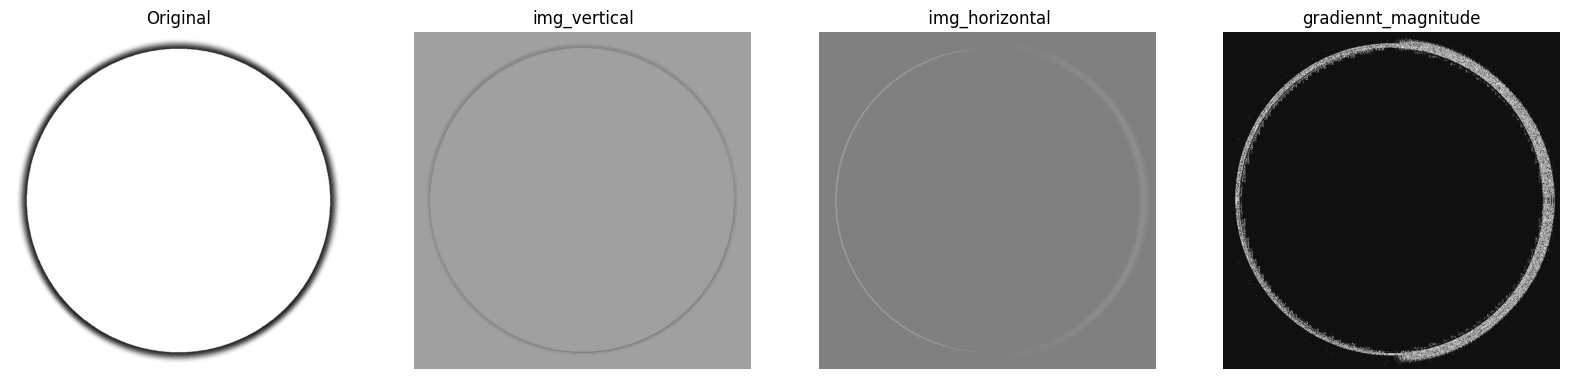

In [42]:
img = cv.imread('square.jpg' , cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

#sobel kernels
sobel_vertical = np.array([[-1,-2,1],[0 , 0, 0],[1,2,1]] , dtype=np.float32)
sobel_horizontal = np.array([[-1,0,1],[-2,0,2],[-1,0,1]] ,dtype=np.float32)

img_vertical = cv.filter2D(img, -1, sobel_vertical)
img_horizontal = cv.filter2D(img, -1, sobel_horizontal)
gradiennt_magnitude = np.sqrt(img_vertical**2 + img_horizontal**2)
#plot the images
f, ax = plt.subplots(1, 4, figsize=(20, 15))

# Plot the original image
ax[0].imshow(img , cmap='gray' , vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')


# Plot the img_vertical image
ax[1].imshow(img_vertical ,  cmap='gray' , vmin=-1020, vmax=1020)
ax[1].set_title('img_vertical')
ax[1].axis('off')


ax[2].imshow( img_horizontal ,  cmap='gray' , vmin=-1020, vmax=1020)
ax[2].set_title(' img_horizontal')
ax[2].axis('off')

ax[3].imshow(gradiennt_magnitude ,  cmap='gray' )
ax[3].set_title('gradiennt_magnitude')
ax[3].axis('off')
plt.show()



### image sharpening

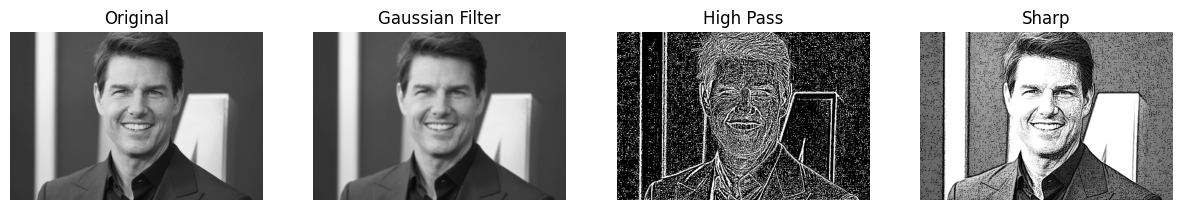

In [59]:
img = cv.imread('tom.jpg' , cv.IMREAD_GRAYSCALE)

gausian_1d = cv.getGaussianKernel(5 , 2)

f_lp = cv.sepFilter2D(img , -1 , gausian_1d , gausian_1d)

f_hp = img - f_lp

f_sharp = cv.addWeighted(img , 2 , f_hp , -0.5 , 0)

fig , ax = plt.subplots(1 , 4 , figsize=(15 , 10))

ax[0].imshow(img , cmap='gray' , vmin=0 , vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(f_lp , cmap='gray' , vmin=0 , vmax=255)
ax[1].set_title('Gaussian Filter')
ax[1].axis('off')
ax[2].imshow(f_hp , cmap='gray' , vmin=0 , vmax=255)
ax[2].set_title('High Pass')
ax[2].axis('off')
ax[3].imshow(f_sharp , cmap='gray', vmin=0 , vmax=255)
ax[3].set_title('Sharp')
ax[3].axis('off')


plt.show()



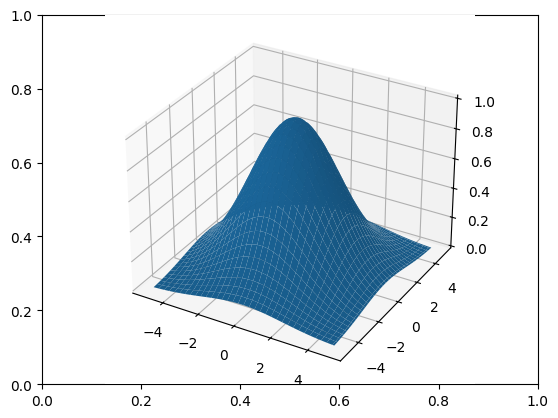

In [65]:
import mpl_toolkits.mplot3d as a3
fig , ax = plt.subplots()
ax = fig.add_subplot(111,projection='3d')

step = 0.1
sigma = 4
x= np.arange(-5,5+step,step)
y= np.arange(-5,5+step,step)
xx,yy = np.meshgrid(x,y)
g = np.exp(-(xx**2+yy**2)/(2*sigma^2))

surf = ax.plot_surface(xx,yy,g)
plt.show()